In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
import urllib.request as request
import matplotlib.pyplot as plt
import os
import pandas

# Download dataset

os.chdir(r"/Users/mrityunjay/Desktop/Deep Learning/Assignment/")

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']

data_train = pandas.read_csv('iris_training.csv',names=names,skiprows=1)
data_test  = pandas.read_csv('iris_test.csv',names=names,skiprows=1)

# Train and test input data

Xtrain = data_train.drop("species", axis=1)
Xtest = data_test.drop("species", axis=1)

# Encode target values into binary ('one-hot' style) representation
ytrain = pd.get_dummies(data_train.species)
ytest = pd.get_dummies(data_test.species)


In [11]:
# Disable_eager_execution

tf.compat.v1.disable_eager_execution()

In [18]:
# Create and train a tensorflow model of a neural network

def train_model(hidden_nodes, num_iters):
    
    # Reset the graph
    tf.compat.v1.reset_default_graph()

    # Placeholders 
    
    X = tf.compat.v1.placeholder(shape=(120, 4), dtype=tf.float64, name='X')
    y = tf.compat.v1.placeholder(shape=(120, 3), dtype=tf.float64, name='y')

    # Variables with number of nodes definition
    
    W1 = tf.Variable(np.random.rand(4, hidden_nodes), dtype=tf.float64)
    W2 = tf.Variable(np.random.rand(hidden_nodes, 3), dtype=tf.float64)

    # Neural net graph
    
    A1 = tf.sigmoid(tf.matmul(X, W1))
    y_est = tf.sigmoid(tf.matmul(A1, W2))

    # loss function
    
    deltas = tf.square(y_est - y)
    loss = tf.reduce_sum(deltas)

    # A train operation to minimize the loss
    
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(0.005)
    train = optimizer.minimize(loss)

    # Initialize variables and run session
    
    init = tf.compat.v1.global_variables_initializer()
    sess = tf.compat.v1.Session()
    sess.run(init)

    # Num of iters iterations
    
    for i in range(num_iters):
        sess.run(train, feed_dict={X: Xtrain, y: ytrain})
        loss_plot[hidden_nodes].append(sess.run(loss, feed_dict={X: Xtrain.as_matrix(), y: ytrain.as_matrix()}))
        weights1 = sess.run(W1)
        weights2 = sess.run(W2)
        
    print("loss (hidden nodes: %d, iterations: %d): %.2f" % (hidden_nodes, num_iters, loss_plot[hidden_nodes][-1]))
    sess.close()
    return weights1, weights2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


loss (hidden nodes: 5, iterations: 2000): 32.02
loss (hidden nodes: 10, iterations: 2000): 5.86
loss (hidden nodes: 20, iterations: 2000): 6.23


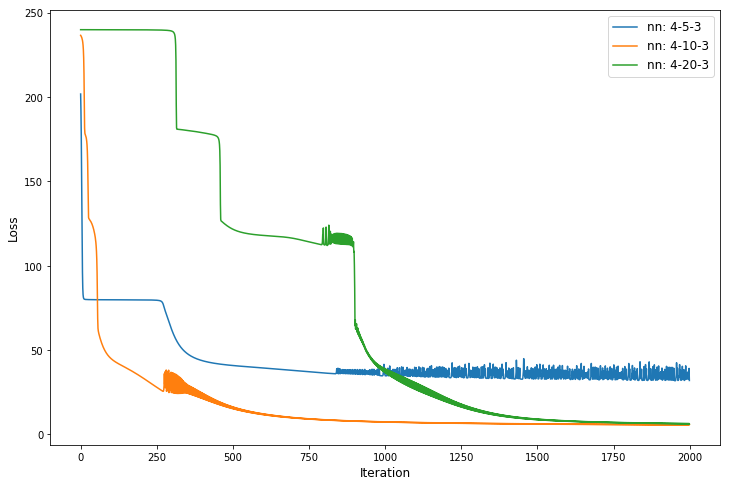

In [19]:
# Run the training for 3 different network architectures: (4-5-3) (4-10-3) (4-20-3)

# Plot the loss function over iterations


num_hidden_nodes = [5, 10, 20]
loss_plot = {5: [], 10: [], 20: []}

weights1 = {5: None, 10: None, 20: None}
weights2 = {5: None, 10: None, 20: None}

num_iters = 2000

plt.figure(figsize=(12,8))

for hidden_nodes in num_hidden_nodes:
    weights1[hidden_nodes], weights2[hidden_nodes] = train_model(hidden_nodes, num_iters)
    plt.plot(range(num_iters), loss_plot[hidden_nodes], label="nn: 4-%d-3" % hidden_nodes)
    
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)


In [20]:
# Evaluate models on the test set

X = tf.compat.v1.placeholder(shape=(30, 4), dtype=tf.float64, name='X')
y = tf.compat.v1.placeholder(shape=(30, 3), dtype=tf.float64, name='y')

for hidden_nodes in num_hidden_nodes:

    # Forward propagation
    
    W1 = tf.Variable(weights1[hidden_nodes])
    W2 = tf.Variable(weights2[hidden_nodes])
    A1 = tf.sigmoid(tf.matmul(X, W1))
    y_est = tf.sigmoid(tf.matmul(A1, W2))

    # Calculate the predicted outputs
    
    init = tf.compat.v1.global_variables_initializer()
    with tf.compat.v1.Session() as sess:
        sess.run(init)
        y_est_np = sess.run(y_est, feed_dict={X: Xtest, y: ytest})

    # Calculate the prediction accuracy
    correct = [estimate.argmax(axis=0) == target.argmax(axis=0) 
               for estimate, target in zip(y_est_np, ytest.as_matrix())]
    accuracy = 100 * sum(correct) / len(correct)
    print('Network architecture 4-%d-3, accuracy: %.2f%%' % (hidden_nodes, accuracy))

Network architecture 4-5-3, accuracy: 86.67%
Network architecture 4-10-3, accuracy: 96.67%
Network architecture 4-20-3, accuracy: 93.33%


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [ ]:
# End of Report # 